In [1]:
import tensorflow as tf
from keras.utils import np_utils
import numpy as np

import os

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load & explore data

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(f'{X_train.shape=}')
print(f'{y_train.shape=}')

print(f'{X_test.shape=}')
print(f'{y_test.shape=}')

X_train.shape=(60000, 28, 28)
y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
y_test.shape=(10000,)


### 1.1 Sample different ways to write each number

In [ ]:
fig, axes = plt.subplots(10, 10, gridspec_kw = {'wspace':0, 'hspace':0})

for num in range(10):
    row_num = num
    digits = X_train[np.argwhere(y_train==num)[:10].flatten()]
    for col_num, digit in enumerate(digits):
        ax = axes[row_num, col_num]
        ax.imshow(digit, cmap=plt.cm.gray_r, vmin=0, vmax=255)
        ax.axis('off')
        ax.set_aspect('equal')

### 1.2 Check if classes are balanced

Text(0, 0.5, 'Number of samples')

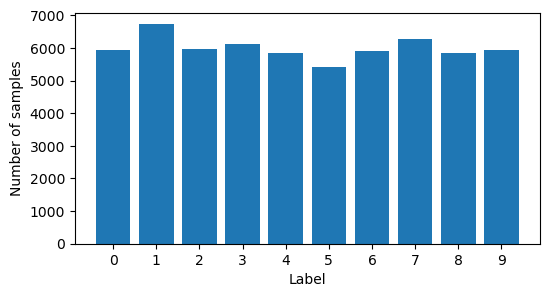

In [8]:
labels, num_samples = np.unique(y_train, return_counts=True)

fig2, ax2 = plt.subplots(figsize=(6,3))
ax2.bar(labels, num_samples)
ax2.set_xlabel('Label')
ax2.set_xticks(range(len(labels)))
ax2.set_ylabel('Number of samples')

## 2 Transform data

In [4]:
# normalizing the data
# divide by 255.0 to convert dtype to float
X_train = X_train / 255.0
X_test = X_test / 255.0

In [5]:
X_train = X_train.reshape(60_000, 28, 28, 1)
X_test = X_test.reshape(10_000, 28, 28, 1)

In [6]:
print(f'{X_train.shape=}')
print(f'{X_test.shape=}')

X_train.shape=(60000, 28, 28, 1)
X_test.shape=(10000, 28, 28, 1)


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = len(labels)
print("Shape before one-hot encoding: ", y_train.shape)

y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## 3. Model

In [10]:
input_shape = (28, 28, 1)

In [14]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [15]:
batch_size = 128
epochs = 15

In [16]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"])

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
y_train.shape

(60000, 10)

In [19]:
history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1)

Epoch 1/15


2023-02-19 22:15:15.668285: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-19 22:15:15.874289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - ETA: 0s - loss: 0.3702 - accuracy: 0.8868

2023-02-19 22:15:23.874575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


422/422 [==============================] - 9s 17ms/step - loss: 0.3702 - accuracy: 0.8868 - val_loss: 0.0942 - val_accuracy: 0.9743
Epoch 2/15
422/422 [==============================] - 6s 15ms/step - loss: 0.1146 - accuracy: 0.9653 - val_loss: 0.0643 - val_accuracy: 0.9823
Epoch 3/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0856 - accuracy: 0.9739 - val_loss: 0.0514 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0716 - accuracy: 0.9789 - val_loss: 0.0483 - val_accuracy: 0.9872
Epoch 5/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0639 - accuracy: 0.9797 - val_loss: 0.0446 - val_accuracy: 0.9868
Epoch 6/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0573 - accuracy: 0.9829 - val_loss: 0.0391 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.0368 - val_accuracy: 0.9907
Epoch 8/15

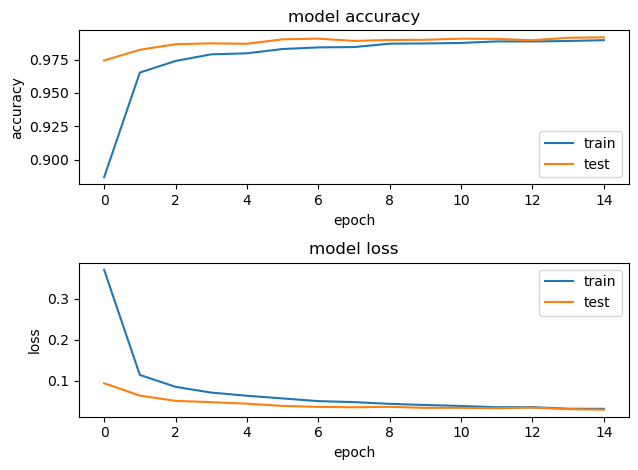

In [37]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [20]:
# saving the model
save_dir = "./results/"
model_name = 'keras_mnist_cnn.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print(f'Saved trained model at {model_path}')

Saved trained model at ./results/keras_mnist_cnn.h5


## 4. Evaluate performance

In [21]:
mnist_model = tf.keras.models.load_model('./results/keras_mnist_cnn.h5')

In [22]:
predicted_probs = mnist_model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

 74/313 [======>.......................] - ETA: 0s

2023-02-19 22:19:02.855391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [24]:
loss_and_metrics = mnist_model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

2023-02-19 22:19:19.609165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 - 2s - loss: 0.0250 - accuracy: 0.9920 - 2s/epoch - 7ms/step
Test Loss 0.025002751499414444
Test Accuracy 0.9920000433921814


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6])

In [44]:
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [45]:
predicted_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [47]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [48]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, predicted_classes)

[Text(0.5, 23.52222222222222, 'predicted class'),
 Text(50.722222222222214, 0.5, 'actual class')]

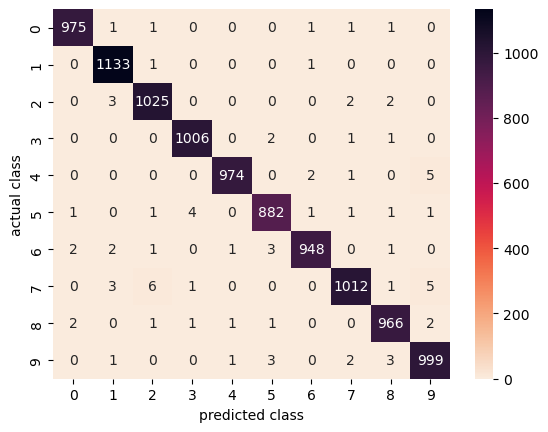

In [49]:
hmap = sns.heatmap(
    confusion_matrix,
    annot=True,
    fmt='.0f',
    cmap=sns.cm.rocket_r)

hmap.set(xlabel='predicted class', ylabel='actual class')

Observations:
- Majority of predictions are on the correct diagonal
- 3 and 5; 4 and 9 are commonly mistaken pairs, which is understandable

## 5. Next steps

* Augment data
* Use a different model (eg. CNN)